<a href="https://colab.research.google.com/github/hufsaim/T10402201/blob/master/notebook/Lab01_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습 1
Google drive에 image파일들을 업로드하고 하나의 image파일을 array로 불러오고 matplotlib.pyplot을 이용하여 display해보기.
- google drive를 colab에 연결하기.
- google drive의 image file의 주소를 가져오기.
- image file을 array형태로 가져오기.
- array를 matplotlib로 display하기.


In [1]:
from skimage import io
import matplotlib.pyplot as plt

In [2]:
myimg = '/content/myimg/a1.png'
I = io.imread(myimg)
print(I.shape)

(630, 636, 4)


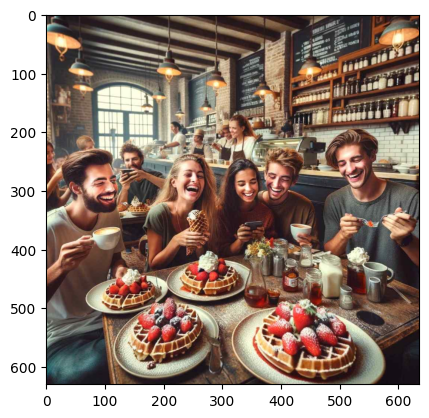

In [3]:
plt.imshow(I)
plt.show()

## 실습 2
Google drive에 있는 image파일들의 list를 생성하여 출력해보자.
- image들을 포함하는 폴더의 주소를 가져오기.
- 폴더 안의 image파일들의 목록을 가져오기.
- 가져온 목록을 출력하고 image파일의 개수를 확인하기.

In [4]:
import glob
import os

In [5]:
myfolder = '/content/myimg/'
mylist = glob.glob(os.path.join(myfolder,'*.png'))
cn = 0
for myimg in mylist:
  cn=cn+1
  print(f'{cn}: {myimg}')
  if cn>4:
    break

1: /content/myimg/c1.png
2: /content/myimg/d1.png
3: /content/myimg/a1.png
4: /content/myimg/d3.png
5: /content/myimg/c3.png


## 실습 3
생성한 list로부터 랜덤하게 N개의 파일들을 불러올 수 있는 data loader를 정의해보자.
- N과 list를 입력으로 하는 generator를 생성하자.
- generator는 image를 같은 크기로 변환하는 과정을 포함하자.
- for loop을 이용해 generator가 제대로 동작하는지 확인하자.


In [6]:
from skimage.transform import resize
from skimage import color
import random
import numpy as np

In [7]:
def myimg_iter(batch_size, mylist):
  N = len(mylist)
  inds = list(range(N))
  random.shuffle(inds)

  for i in range(0,N, batch_size):
    batch_inds = inds[i:min(i+batch_size, N)]
    batch_img = np.zeros((len(batch_inds),256,256))
    batch_myfile = []

    for bi in range(0, len(batch_inds)):
      img = io.imread(mylist[batch_inds[bi]])
      if len(img.shape)==3:
        img = resize(img[:,:,0],(256,256))
      else:
        img = resize(img,(256,256))
      batch_img[bi] = img
      batch_myfile.append(mylist[batch_inds[bi]].split('/')[-1])

    yield batch_img, batch_myfile

### 1번째 step ###


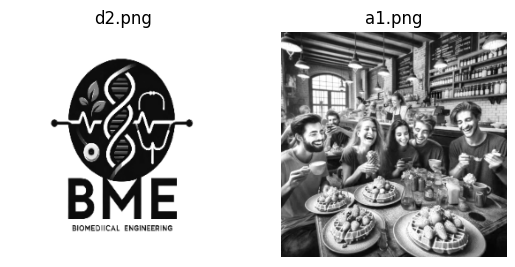

### 2번째 step ###


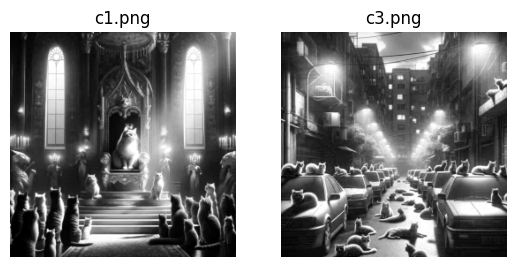

### 3번째 step ###


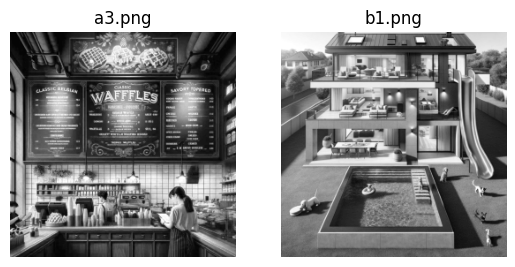

### 4번째 step ###


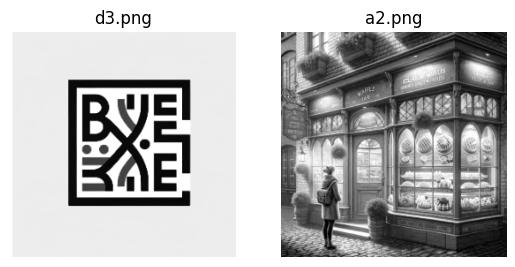

### 5번째 step ###


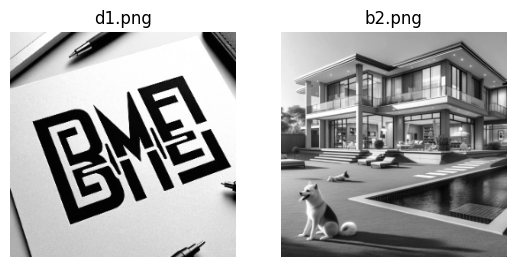

In [8]:
myimage_iter = myimg_iter(2, mylist)
cn = 0
for X, y in myimage_iter:
  cn=cn+1
  print(f'### {cn}번째 step ###')
  for j in range(len(y)):
    plt.subplot(1,len(y),j+1)
    plt.imshow(X[j],cmap='gray')
    plt.axis('off')
    plt.title(y[j])
  plt.show()
  if cn>4:
    break